Total within-cluster sum of squares:  0.0


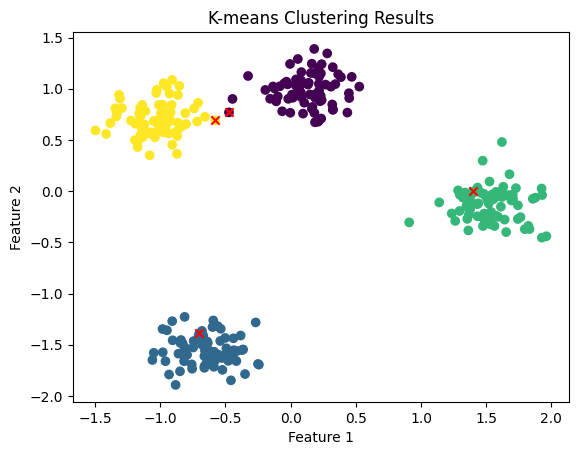

In [52]:
# Aisha Muhammad Nawaz 20L-0921 BSCS 6E1 AI LAB 13

# 1. Import the required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler


# 2. Load and preprocess the dataset:
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42) # Generate a synthetic dataset with 300 samples and 2 features
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

centroids=[[],[],[],[]]
clusters=[-1 for i in range (300)] #Initially all data samples in cluster -1 i.e in none

# 3. Implement the K-means algorithm:
def initialize_centroids(data, k): # Randomly initialize the centroids from the data points. 
  global clusters
  centres=[[],[],[],[]]
  randomIndexes=random.sample(range(0,300),k) #To ensure unique random index for each centroid
  for i in range (int(k)):
    centres[i]=data_scaled[randomIndexes[i]] #Any random sample point from whole dataset
    clusters[randomIndexes[i]]=i  #these sample points have been assigned clusters
  return centres

def compute_distances(data, centroids): # Compute the distances between each data point and centroids. 
 result=[[],[],[],[]] #d1, d2, d3, d4
 
 for i in range(len(centroids)):
  x=centroids[i][0]
  y=centroids[i][1]
  result[i]= ( (data[0]-x)**2 + (data[1]-y)**2 )**1/2
  
 return result


def assign_clusters(distances): # Assign each data point to the closest centroid. 
 min=distances[0]
 min_index=0

 for i in range(len(distances)):
   if(distances[i]<min):
     min_index=i
     min=distances[i]

 return min_index  #Cluster will be assigned with which cluster the distance of sample point is least.


def update_centroids(data, assignedCluster,s, k): #Update the centroids by computing the mean of the points in each clusters. 
 global clusters
 global centroids
 if(not(clusters[s] == assignedCluster)): #Sample point has been assigned a cluster it was not in before
   x=centroids[s][0]
   y=centroids[s][1]
   
   #Update centroid of cluster from which it was removed
   centroids[s][0]=(data[0]+x)/2
   centroids[s][1]=(data[1]+y)/2

   x=centroids[assignedCluster][0]
   y=centroids[assignedCluster][1]

   #Update centroid of cluster to which it was added
   centroids[assignedCluster][0]=(data[0]+x)/2
   centroids[assignedCluster][1]=(data[1]+y)/2

 return centroids


def k_means(data, k, max_iterations=100): #Implement the K-means clustering algorithm. 
 global centroids
 global clusters
 newClusters=[-1 for i in range (300) ] #Initially all data samples in cluster -1 i.e in none
 oldClusters=clusters

 for _ in range(max_iterations):
   for s in range(len(data)):
    samplePoint=data[s]
    d=compute_distances(samplePoint,centroids) #d has distance of this sth sample point  from all the centroids.
    clusterAssigned=assign_clusters(d)
    newClusters[s]=clusterAssigned     
    centroids=update_centroids(samplePoint,clusterAssigned,s,k)
    clusters=newClusters
    
   if(newClusters==oldClusters): #No cluster updated hence stop.
    break
   oldClusters=newClusters
   
 return centroids,newClusters

# 4. Evaluate the results:
k = 4 # Choose the number of clusters, K
centroids=initialize_centroids(data_scaled, k)
# Run the K-means algorithm:
centroids, clusters = k_means(data_scaled, k)

#  Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

# 5. Visualize the clusters:
# Plot the dataset with the assigned clusters and centroids
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters, cmap='viridis')
centroidsX=[]
centroidsX2=[]
for i in range (k):
  centroidsX.append(centroids[i][0])
  centroidsX2.append(centroids[i][1])
  
plt.scatter(centroidsX, centroidsX2, c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering Results')
plt.show()

# Make sure to complete both K mean and K medoids with their visualization and testing and submit a single notebook. [DO ONLY K-MEANS FOR LAB 13]

